### SENTIMENT ANALYSIS OF SONGS FROM 1964-2015

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("billboard_lyrics_1964-2015.csv", encoding = "ISO-8859-1")

In [3]:
dec1= df["Lyrics"][0:10].values


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import sent_tokenize,word_tokenize 
from nltk.book import *
import gensim.summarization

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint


In [8]:
lyrics = [[word for word in track.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for track in dec1]

In [9]:
lyrics

[['sam',
  'sham',
  'miscellaneous',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'sam',
  'sham',
  'pharaohs',
  'domingo',
  'samudio',
  'uno',
  'dos',
  'tres',
  'quatro',
  'matty',
  'told',
  'hatty',
  'thing',
  'saw',
  'big',
  'horns',
  'wooly',
  'jaw',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'hatty',
  'told',
  'matty',
  'lets',
  'dont',
  'chance',
  'lets',
  'belseven',
  'come',
  'learn',
  'dance',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'matty',
  'told',
  'hatty',
  'thats',
  'thing',
  'pull',
  'wool',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'lseven',
  'letter',
  'l',
  'number',
  '7',
  'typed',
  'form',
  'rough',
  'square',
  'l7',
  'lyrics',
  'mean',
  'lets',
  'square'],
 ['sugar',
  'pie',
  'honey',
  'bunch',
  'know',
  'l

In [11]:
#Set parameters
num_topics = 5 #The number of topics that should be generated
passes = 10
dictionary = corpora.Dictionary(lyrics)
corpus = [dictionary.doc2bow(text) for text in lyrics]

lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)

In [15]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=8))

len(corpus)



from operator import itemgetter
lda.get_document_topics(corpus[0],minimum_probability=0.05,per_word_topics=False)
sorted(lda.get_document_topics(corpus[9],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)


[   (   0,
        '0.054*"wooly" + 0.051*"bully" + 0.036*"feelin" + 0.036*"gone" + '
        '0.036*"lovin" + 0.024*"love" + 0.021*"baby" + 0.018*"dont"'),
    (   1,
        '0.080*"help" + 0.051*"girl" + 0.032*"ive" + 0.029*"im" + 0.023*"love" '
        '+ 0.023*"got" + 0.020*"honey" + 0.017*"know"'),
    (   2,
        '0.112*"got" + 0.075*"whoaoh" + 0.038*"mind" + 0.031*"troubles" + '
        '0.031*"worries" + 0.024*"bind" + 0.024*"wounds" + 0.024*"morning"'),
    (   3,
        '0.086*"downtown" + 0.035*"forget" + 0.024*"youre" + 0.018*"lights" + '
        '0.018*"troubles" + 0.018*"waiting" + 0.018*"things" + '
        '0.018*"caresso"'),
    (   4,
        '0.126*"baby" + 0.072*"heartbeat" + 0.072*"hear" + 0.043*"youre" + '
        '0.037*"love" + 0.019*"cause" + 0.019*"poundin" + 0.013*"gonna"')]


[(1, 0.9890774),
 (4, 0.00275825),
 (2, 0.002741316),
 (0, 0.0027179935),
 (3, 0.0027050213)]

In [16]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*1000)
        alist=[word]
        word_list.extend(alist*freq)

    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    from random import shuffle
    shuffle(word_list)
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)

    return None

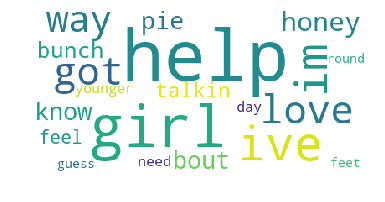

In [24]:
draw_wordcloud(lda,1)